 Operators on two qubits

In [5]:
!pip install matplotlib


In [6]:
!pip install pylatexenc


In [12]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

# 2 qubit'li bir kuantum devresi oluştur
qc = QuantumCircuit(2)

# Her iki qubit'e Hadamard kapısı uygula
qc.h(0)
qc.h(1)

# Devreyi çizdir ve matplotlib ile göster
figure = qc.draw(output='mpl', reverse_bits=True)  # 'mpl' kullanarak matplotlib çıktısı al
plt.show()  # Çizimi ekranda göster



In [11]:
import pylatexenc

print(pylatexenc.__version__)

2.10


In [17]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

# 2 qubit'li bir kuantum devresi oluştur
qc = QuantumCircuit(2)

# Her iki qubit'e Hadamard kapısı uygula
qc.h(0)
qc.h(1)

# Devreyi çizdir ve matplotlib ile göster
figure = qc.draw(output='mpl', reverse_bits=True)  # 'mpl' kullanarak matplotlib çıktısı al
plt.show()  # Çizimi ekranda göster
# Devreyi metin formatında çizdir
print(qc.draw(output='text'))


     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘


|00⟩ ile sonuçlanma olasılığı: 25%
|01⟩ ile sonuçlanma olasılığı: 25%
|10⟩ ile sonuçlanma olasılığı: 25%
|11⟩ ile sonuçlanma olasılığı: 25%

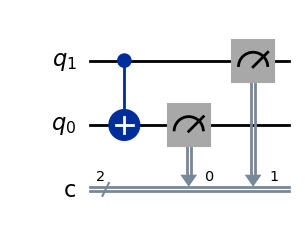

00 --CNOT-> {'00': 1024}


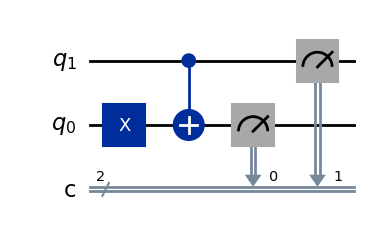

01 --CNOT-> {'01': 1024}


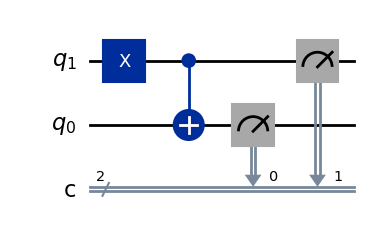

10 --CNOT-> {'11': 1024}


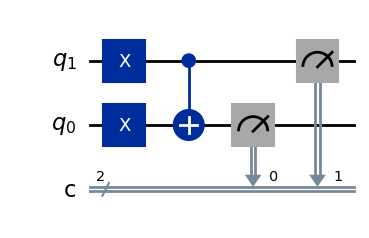

11 --CNOT-> {'10': 1024}


In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

pairs = ['00','01','10','11']

for pair in pairs:
    qc = QuantumCircuit(2,2)
    # initialize the pair
    # we follow the reading order in Qiskit
    # q1-tensor-q0
    if pair[1] == '1':
        qc.x(0)
    if pair[0] =='1':
        qc.x(1)
    qc.cx(1,0)
    qc.measure(0,0)
    qc.measure(1,1)
    display(qc.draw(output='mpl',reverse_bits=True))
    job = AerSimulator().run(qc,shots=1024)
    counts = job.result().get_counts(qc)
    print(pair,"--CNOT->",counts)